<a href="https://www.kaggle.com/code/palukuriyogitha/amazon-reviews-analysis?scriptVersionId=119281664" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [3]:
# Read the dataset into a pandas dataframe
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


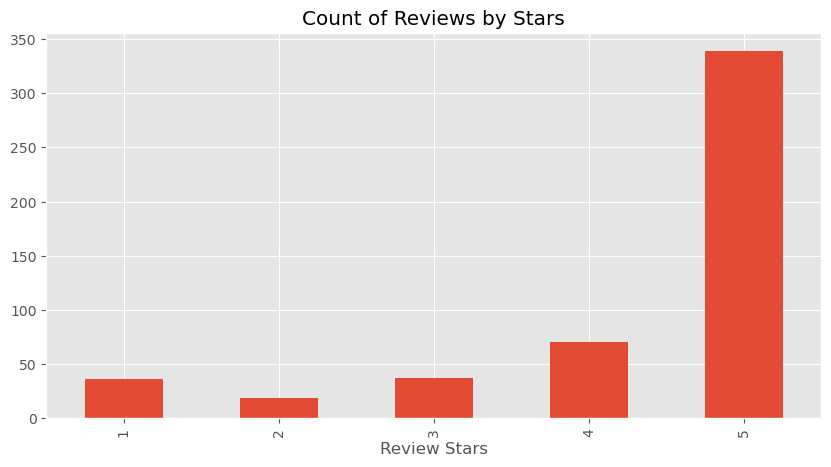

In [4]:
#scores
ax = df['Score'].value_counts().sort_index() \
.plot(kind='bar',title='Count of Reviews by Stars' ,
      figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
## Basic NLTK

In [6]:
example = df['Text'][120]
print(example)

I have done a lot of research to find the best food for my cat, and this is an excellent food.  That is also according to my holistic veterinarian.  They put probiotics on the kibble as the last step, which is very important to me.  The best thing is that my cat loved it immediately and I had to stop mixing it with the old food because she only would eat Holistic Select.


In [7]:
tokens = nltk.word_tokenize(example)
tagged = nltk.pos_tag(tokens)
print(tagged)


[('I', 'PRP'), ('have', 'VBP'), ('done', 'VBN'), ('a', 'DT'), ('lot', 'NN'), ('of', 'IN'), ('research', 'NN'), ('to', 'TO'), ('find', 'VB'), ('the', 'DT'), ('best', 'JJS'), ('food', 'NN'), ('for', 'IN'), ('my', 'PRP$'), ('cat', 'NN'), (',', ','), ('and', 'CC'), ('this', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('excellent', 'JJ'), ('food', 'NN'), ('.', '.'), ('That', 'DT'), ('is', 'VBZ'), ('also', 'RB'), ('according', 'VBG'), ('to', 'TO'), ('my', 'PRP$'), ('holistic', 'JJ'), ('veterinarian', 'NN'), ('.', '.'), ('They', 'PRP'), ('put', 'VBD'), ('probiotics', 'NNS'), ('on', 'IN'), ('the', 'DT'), ('kibble', 'JJ'), ('as', 'IN'), ('the', 'DT'), ('last', 'JJ'), ('step', 'NN'), (',', ','), ('which', 'WDT'), ('is', 'VBZ'), ('very', 'RB'), ('important', 'JJ'), ('to', 'TO'), ('me', 'PRP'), ('.', '.'), ('The', 'DT'), ('best', 'JJS'), ('thing', 'NN'), ('is', 'VBZ'), ('that', 'IN'), ('my', 'PRP$'), ('cat', 'NN'), ('loved', 'VBD'), ('it', 'PRP'), ('immediately', 'RB'), ('and', 'CC'), ('I', 'PRP'), ('had'

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  I/PRP
  have/VBP
  done/VBN
  a/DT
  lot/NN
  of/IN
  research/NN
  to/TO
  find/VB
  the/DT
  best/JJS
  food/NN
  for/IN
  my/PRP$
  cat/NN
  ,/,
  and/CC
  this/DT
  is/VBZ
  an/DT
  excellent/JJ
  food/NN
  ./.
  That/DT
  is/VBZ
  also/RB
  according/VBG
  to/TO
  my/PRP$
  holistic/JJ
  veterinarian/NN
  ./.
  They/PRP
  put/VBD
  probiotics/NNS
  on/IN
  the/DT
  kibble/JJ
  as/IN
  the/DT
  last/JJ
  step/NN
  ,/,
  which/WDT
  is/VBZ
  very/RB
  important/JJ
  to/TO
  me/PRP
  ./.
  The/DT
  best/JJS
  thing/NN
  is/VBZ
  that/IN
  my/PRP$
  cat/NN
  loved/VBD
  it/PRP
  immediately/RB
  and/CC
  I/PRP
  had/VBD
  to/TO
  stop/VB
  mixing/VBG
  it/PRP
  with/IN
  the/DT
  old/JJ
  food/NN
  because/IN
  she/PRP
  only/RB
  would/MD
  eat/VB
  (ORGANIZATION Holistic/JJ Select/NNP)
  ./.)


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores('I am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

In [11]:
##Run the Polarity Scores on the Entire Dataset
res={}
for i , row in tqdm(df.iterrows() , total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [12]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [13]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders = vaders.merge(df , how='right')

In [15]:
#now we have sentiment score and meta data

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


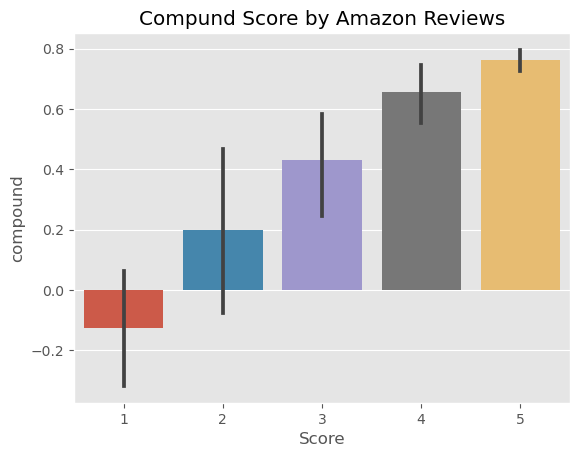

In [16]:
ax = sns.barplot(data = vaders, x='Score' , y='compound')
ax.set_title('Compund Score by Amazon Reviews')
plt.show()

<AxesSubplot:xlabel='Score', ylabel='pos'>

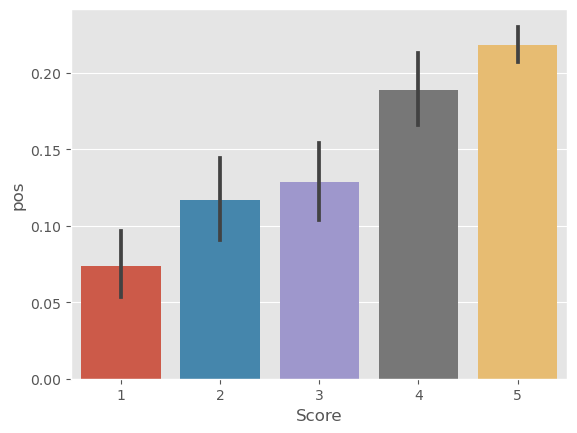

In [17]:
sns.barplot(data = vaders , x='Score' , y='pos')

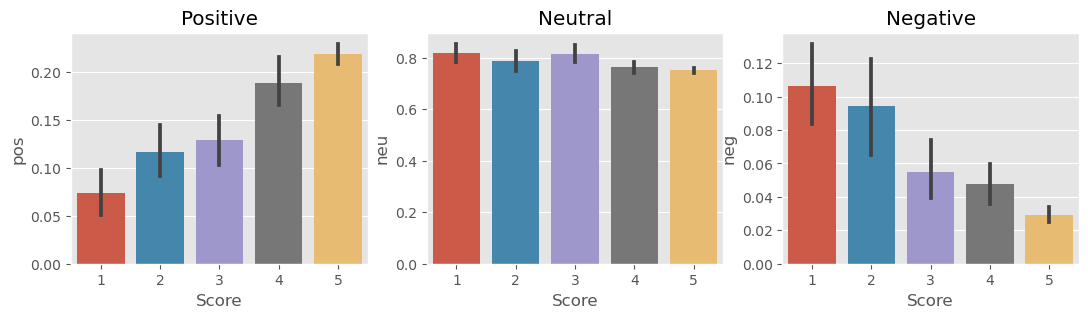

In [18]:
fig,axs = plt.subplots(1 ,3, figsize=(13,3))
sns.barplot(data = vaders , x='Score' , y='pos' , ax=axs[0])
sns.barplot(data = vaders , x='Score' , y='neu' , ax=axs[1])
sns.barplot(data = vaders , x='Score' , y='neg' , ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()


Roberta PreTrained Model

In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [21]:
# VADER RESULTS
print(example)
sia.polarity_scores(example)

I have done a lot of research to find the best food for my cat, and this is an excellent food.  That is also according to my holistic veterinarian.  They put probiotics on the kibble as the last step, which is very important to me.  The best thing is that my cat loved it immediately and I had to stop mixing it with the old food because she only would eat Holistic Select.


{'neg': 0.026, 'neu': 0.759, 'pos': 0.215, 'compound': 0.9509}

In [22]:
tokenizer(example , return_tensors=('pt'))

{'input_ids': tensor([[    0,   100,    33,   626,    10,   319,     9,   557,     7,   465,
             5,   275,   689,    13,   127,  4758,     6,     8,    42,    16,
            41,  4206,   689,     4,  1437,   280,    16,    67,   309,     7,
           127, 23015, 29231,     4,  1437,   252,   342, 16245, 34339,    15,
             5,   449, 42958,    25,     5,    94,  1149,     6,    61,    16,
           182,   505,     7,   162,     4,  1437,    20,   275,   631,    16,
            14,   127,  4758,  2638,    24,  1320,     8,    38,    56,     7,
           912, 17793,    24,    19,     5,   793,   689,   142,    79,   129,
            74,  3529,  6217,  5580, 10908,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict={
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0035531686, 'roberta_neu': 0.022995984, 'roberta_pos': 0.9734509}


In [24]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict={
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [25]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [26]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index' : 'Id'})
results_df = results_df.merge(df , how='right')

In [27]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


compare scores between models

In [28]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

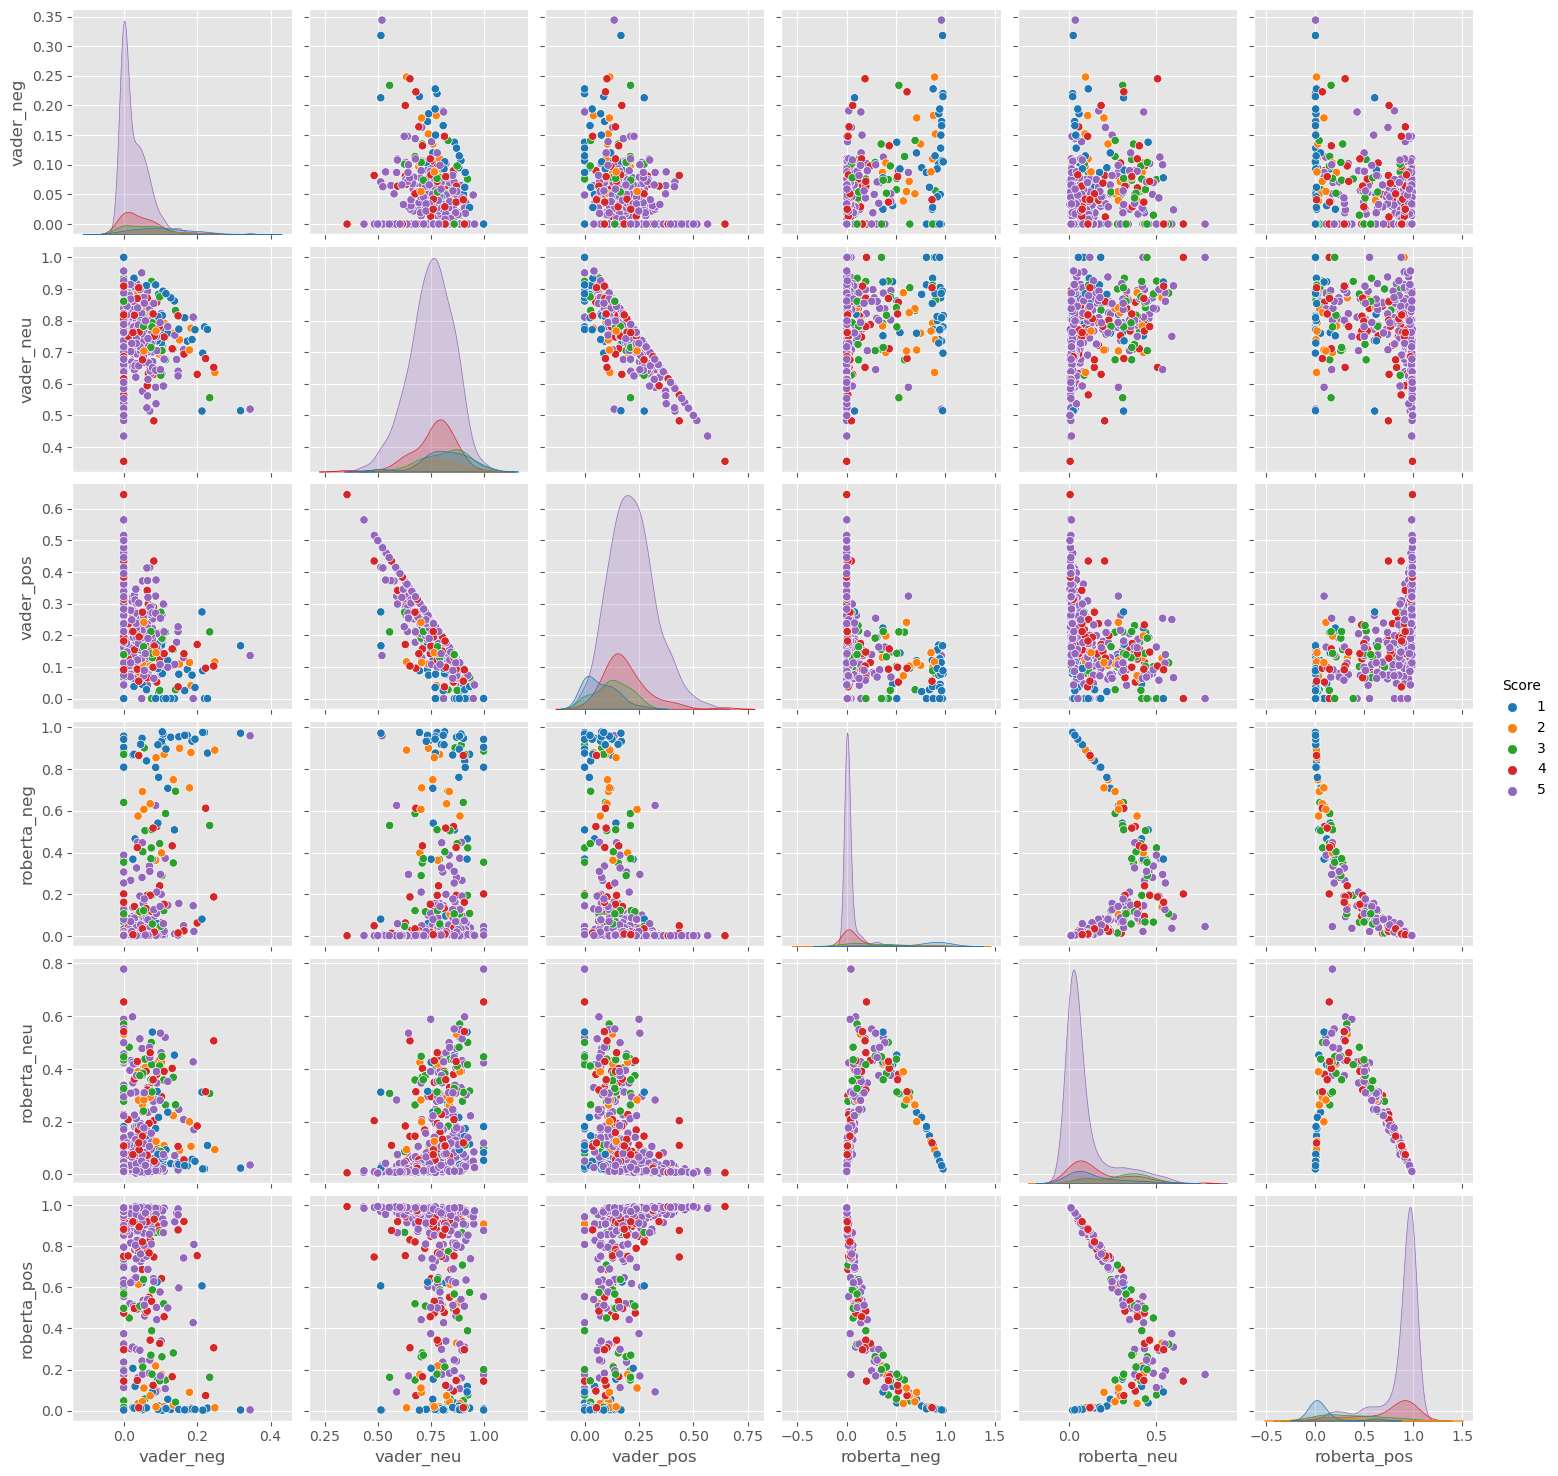

In [29]:
sns.pairplot(data=results_df , 
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')


review examples

In [30]:
results_df.query('Score == 1 ')\
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [31]:
results_df.query('Score == 1 ')\
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

negative 5-star review

In [32]:
results_df.query('Score == 5 ')\
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [33]:
results_df.query('Score == 5 ')\
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [34]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

2023-02-15 18:07:21.394063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-15 18:07:21.394115: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [35]:
sentiment_pipeline("i love this project")

[{'label': 'POSITIVE', 'score': 0.999884843826294}]

In [36]:
sentiment_pipeline("boo")

[{'label': 'NEGATIVE', 'score': 0.9715902209281921}]